In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
# Define CIFAR-10 class names
cifar_10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
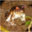

In [ ]:
X_train[0]

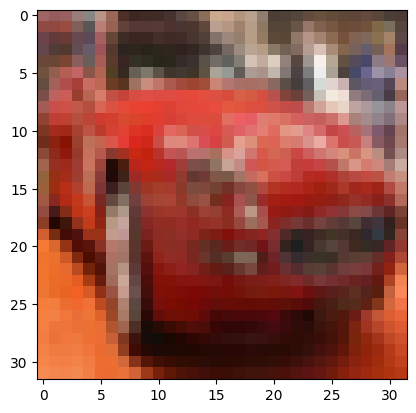

In [ ]:
plt.imshow(X_train[5])

In [ ]:
print(X_train[5]) ### We checked the image pixel by pixel

[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


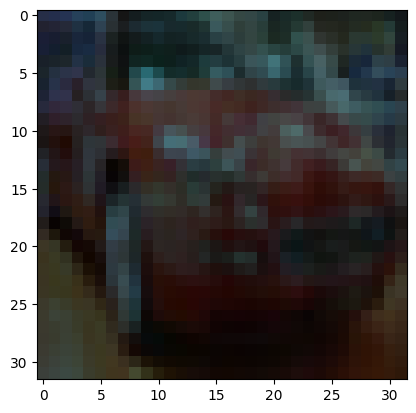

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis = 1) # we can normalize all values
X_test = tf.keras.utils.normalize(X_test, axis = 1)   # and we can see the all pixels between 0 and 1 using axis
plt.imshow(X_train[5])

In [ ]:
print(X_train[5])  # you can see all values are normalized.

[[[0.15135974 0.18209583 0.28065302]
  [0.14449955 0.183292   0.3013778 ]
  [0.14582159 0.20343452 0.32802671]
  ...
  [0.11637761 0.14693244 0.1198155 ]
  [0.08785805 0.13060481 0.1272797 ]
  [0.07578255 0.09738084 0.10701057]]

 [[0.13517662 0.13389399 0.18895451]
  [0.14064623 0.14502224 0.20937826]
  [0.14772776 0.16274762 0.21981171]
  ...
  [0.16241711 0.21729446 0.15190893]
  [0.14484705 0.23011323 0.2152184 ]
  [0.08575394 0.11584962 0.11868446]]

 [[0.10376234 0.11961197 0.20840571]
  [0.0953697  0.11682347 0.19034387]
  [0.10007364 0.12634354 0.17584937]
  ...
  [0.17520586 0.23178075 0.171165  ]
  [0.19352515 0.27364816 0.24298851]
  [0.09273391 0.12088656 0.13814092]]

 ...

 [[0.23227532 0.23029767 0.194512  ]
  [0.23119928 0.24774632 0.20620586]
  [0.22969283 0.26125275 0.21981171]
  ...
  [0.19950448 0.08691778 0.03209344]
  [0.21252149 0.12231244 0.06016858]
  [0.19942777 0.12256554 0.07004329]]

 [[0.23417922 0.23743868 0.20562697]
  [0.23408927 0.25781731 0.22841265]


In [ ]:
print(y_train[5])   #just to check that we have labels inside our network

[1]


In [ ]:
IMG_SIZE = 32           # Resizing image to make it suitable for apply Convolution operation
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)   #increasing one dimension for kernel operation
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print ("Training Samples dimension",X_trainr.shape)
print ("Testing Samples dimension",X_testr.shape)

Training Samples dimension (50000, 32, 32, 3)
Testing Samples dimension (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()  # Creating a neural network

# First Convolution Layer 32 -3 + 1 = 30x30
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:])) # Only for first Convolution Layer to mention input layer size
model.add(Activation("relu"))  # activaiton function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling single maximum value of 2x2 and MaxPooling2D divides in half the convolution layer = 15x15

# 2nd Convolution layer  15-3+1 = 13x13
model.add(Conv2D(64, (3,3))) # 2nd Convolution Layer
model.add(Activation("relu")) # activaiton function
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling

# 3rd convolution Layer  6-3+1 = 4x4
model.add(Conv2D(64, (3,3))) # 3rd Convolution Layer
model.add(Activation("relu"))  # activaiton function
model.add(MaxPooling2D(pool_size=(2,2)))  # MaxPooling

# Fully Connected Layer
model.add(Flatten()) # before using fully connected layer, need to be flatten
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) # This last Dense layer must be equal to 10
model.add(Activation('softmax')) # Activaiton function is changed to  softmax (class probabilities)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 activation (Activation)     (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [ ]:
print("Total Training Samples = ", len(X_trainr))

Total Training Samples =  50000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_trainr, y_train, epochs=30, validation_split= 0.3) # We create 30 epochs for higher accuracy and lower loss.

Epoch 1/30
1094/1094 [==============================] - 78s 71ms/step - loss: 1.6488 - accuracy: 0.3959 - val_loss: 1.5187 - val_accuracy: 0.4523
Epoch 2/30
1094/1094 [==============================] - 74s 68ms/step - loss: 1.4385 - accuracy: 0.4854 - val_loss: 1.4097 - val_accuracy: 0.4943
Epoch 3/30
1094/1094 [==============================] - 78s 72ms/step - loss: 1.2841 - accuracy: 0.5425 - val_loss: 1.2342 - val_accuracy: 0.5647
Epoch 4/30
1094/1094 [==============================] - 76s 69ms/step - loss: 1.1820 - accuracy: 0.5831 - val_loss: 1.2092 - val_accuracy: 0.5707
Epoch 5/30
1094/1094 [==============================] - 80s 73ms/step - loss: 1.1082 - accuracy: 0.6081 - val_loss: 1.0957 - val_accuracy: 0.6161
Epoch 6/30
1094/1094 [==============================] - 75s 68ms/step - loss: 1.0424 - accuracy: 0.6334 - val_loss: 1.1592 - val_accuracy: 0.5949
Epoch 7/30
1094/1094 [==============================] - 79s 72ms/step - loss: 1.0025 - accuracy: 0.6478 - val_loss: 1.0794 -

In [ ]:
X_testr = tf.keras.utils.normalize(X_testr, axis = 1)  # X_testr is normalized because predict method gets normalized variables.

In [ ]:
predictions = model.predict([X_testr])  # Prediction operation is done.

313/313 [==============================] - 7s 21ms/step


In [ ]:
print(predictions)

[[3.1246433e-05 3.2872561e-04 1.0470022e-04 ... 6.5954810e-05
  2.1852908e-01 1.0685923e-03]
 [1.5573360e-01 1.8575646e-02 2.1158810e-06 ... 1.3252089e-06
  8.1576830e-01 9.8949764e-03]
 [1.8539903e-01 7.7348150e-02 4.4732834e-03 ... 3.0168833e-04
  6.2521738e-01 8.6173110e-02]
 ...
 [1.8689256e-05 5.1448705e-08 7.1482416e-03 ... 2.8990131e-02
  1.6191404e-04 9.4584684e-05]
 [6.8120158e-01 1.4163122e-01 7.7787317e-02 ... 1.8779640e-03
  1.5198139e-03 6.2953332e-05]
 [2.1289965e-09 8.2621590e-09 4.9974624e-08 ... 9.9985695e-01
  1.5894737e-09 3.9803405e-10]]


In [ ]:
predicted = np.argmax(predictions[20])  # We create a variable named predicted and we predicted 20th image using argmax method from numpy.

In [ ]:
cifar_10_classes[predicted] # We get the result of prediction operation.

'horse'

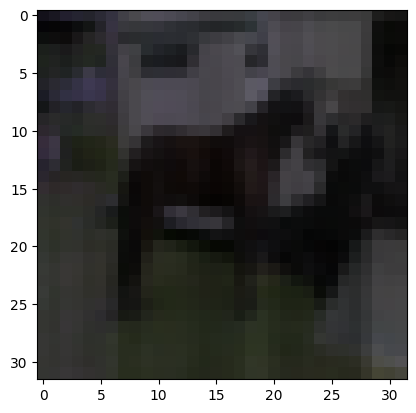

In [ ]:
plt.imshow(X_test[20]) # This is the proof.